# Logistic Regression

*Logistic Regression using negative log likelihood loss with $L_2$ regularization penalty*

---
* [Theory and Derivation](../theory/logistic_regression.ipynb)
* [Implementation in Python](../pymlalgo/regression/regularised_logistic_regression.py)

---

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import os 
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

**Using the [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) with two classes to demo the implementation of Logistic regression**

In [6]:
from sklearn.datasets import load_digits

In [7]:
digits = load_digits(n_class = 2)
predictors = digits.data
response = digits.target
x = np.asarray(predictors)
y = np.asarray(response).reshape(-1, 1)
y = np.where(y==0,-1,1)

**Train, test split**

In [8]:
from pymlalgo.util.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((294, 64), (72, 64), (294, 1), (72, 1))

**Normalizing the Data as** $\frac{x-\mu}{\sigma}$ 

In [9]:
from pymlalgo.util.standardization import Standardizer
x_standardizer = Standardizer(x_train)
x_train = x_standardizer.standardize(x_train)
x_test = x_standardizer.standardize(x_test)

**Training the model using `LogisticRegression`**

In [10]:
from pymlalgo.regression.regularised_logistic_regression import LogisticRegression
lamb = 1
logistic_model = LogisticRegression(x_train, y_train, lamd=lamb, eps=1e-4, max_iterations=1000)
logistic_model.train()

**Cost history vs number of iterations**

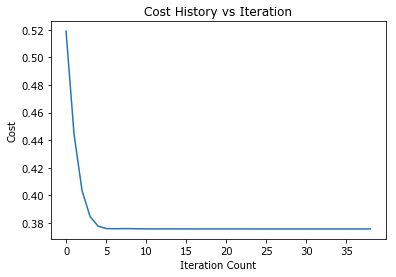

In [9]:
plt.plot(logistic_model.cost_history_fastgrad[1:])
plt.xlabel('Iteration Count')
plt.ylabel('Cost')
plt.title('Cost History vs Iteration');

**Misclassification error reported on train and test data**

In [10]:
pd.DataFrame({'train_score' : [logistic_model.score(x_train, y_train)], 
              'test_score': [logistic_model.score(x_test, y_test)]})

train_score  test_score
0     0.996599         1.0

**Comparison with `sklearn`**  

The cost function in `sklearn` is $$ F(\beta) = \frac{||Y - X^T\beta||_2^2 + C ||\beta||_2^2}{2m}$$
To make it equivalent to the cost function in current implementation, $$\lambda = \frac{1}{2*m*C}$$, where m is number of training samples 

In [11]:
from sklearn.linear_model import LogisticRegression

alpha = 1/(2*len(x_train)*lamb)
logistic_sk = LogisticRegression(C = alpha, random_state = 42,fit_intercept=False, solver = 'lbfgs')
logistic_sk.fit(x_train, y_train.ravel())

pd.DataFrame({'coef': logistic_model.beta.flatten(), 'sk_coef' : logistic_sk.coef_.flatten()})

LogisticRegression(C=0.0017006802721088435, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

coef   sk_coef
0   0.000000  0.000000
1  -0.000641 -0.000638
2  -0.015974 -0.015961
3  -0.044998 -0.044999
4  -0.015942 -0.015941
5   0.042122  0.042134
6   0.039379  0.039389
7   0.000000  0.000000
8   0.000000  0.000000
9  -0.025778 -0.025774
10 -0.064373 -0.064364
11 -0.012909 -0.012910
12  0.025129  0.025139
13 -0.020036 -0.020033
14  0.013940  0.013943
15  0.000000  0.000000
16  0.010086  0.010088
17 -0.032959 -0.032949
18 -0.055917 -0.055911
19  0.078315  0.078323
20  0.090925  0.090943
21 -0.039517 -0.039517
22 -0.044754 -0.044754
23  0.000000  0.000000
24  0.010078  0.010079
25 -0.044012 -0.044008
26 -0.034343 -0.034340
27  0.083986  0.083993
28  0.095191  0.095205
29 -0.024126 -0.024129
..       ...       ...
34 -0.045113 -0.045112
35  0.076338  0.076347
36  0.095276  0.095287
37 -0.028009 -0.028017
38 -0.081301 -0.081302
39  0.000000  0.000000
40  0.000000  0.000000
41 -0.057066 -0.057057
42 -0.068958 -0.068957
43  0.061600  0.061609
44  0.086686  0.086690
45 -0.047573 -0.047586
46 -0.066793 -0.066791
47  0.000000  0.000000
48  0.000000  0.000000
49 -0.025808 -0.025797
50 -0.069736 -0.069732
51 -0.002407 -0.002410
52  0.031240  0.031233
53 -0.042561 -0.042565
54 -0.000718 -0.000714
55  0.020418  0.020416
56  0.000000  0.000000
57  0.001913  0.001913
58 -0.021058 -0.021045
59 -0.049565 -0.049569
60 -0.008111 -0.008113
61  0.038481  0.038489
62  0.036878  0.036879
63  0.025064  0.025061

[64 rows x 2 columns]

In [12]:
pd.DataFrame({'train_score' : [logistic_model.score(x_train, y_train)], 
              'train_score_sk' : [logistic_sk.score(x_train, y_train)],
              'test_score': [logistic_model.score(x_test, y_test)],
              'test_score_sk' : [logistic_sk.score(x_test, y_test)]})

train_score  train_score_sk  test_score  test_score_sk
0     0.996599        0.996599         1.0            1.0